# Logistic Regression

- classification algorithm used to predict discrete values such as 0 or 1; malignant or benign, spam or not spam

- based on the concept of probability; uses a logistic function, also known as the Sigmoid function. The hypothesis of logistic regression tends to limit the Sigmoid function between 0 and 1


**Example**: If we have two classes, dog and cat. Assign 1 for dogs and 0 for cats. Using a logistic regression, we set a threshold value. The values above the threshold point can be classified as class 1 (dogs), and the values below the threshold point can be classified as class 0 (cats).


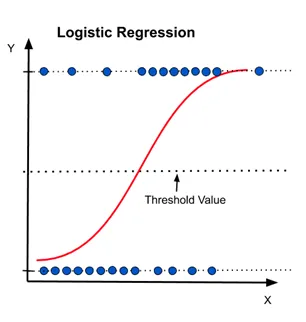

### Problem statement

The aim is to make predictions on the survival outcome of passengers on the Titanic. This is a binary classification, so logistic regression can be used to build the model.

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading in the data
titanic = pd.read_csv('titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# checking for misisng values
titanic.isnull().sum()


# imputation of missing values
# median of the age column
print('Median of Age column: %.2f' % (titanic['Age'].median(skipna= True)))

# Percentage of missing records in the cabin column
print('Percent of missing records in the Cabin column: %.2f%%' %((titanic['Cabin'].isnull().sum()/titanic.shape[0])*100))

# Most common boarding port
print('Most common boarding port: %s' % titanic['Embarked'].value_counts().idxmax())

Median of Age column: 28.00
Percent of missing records in the Cabin column: 77.10%
Most common boarding port: S


In [5]:
# Filling age column by median
titanic['Age'].fillna(titanic['Age'].median(skipna= True),
                      inplace=True)

# filling embarked column by most common port
titanic['Embarked'].fillna(titanic['Embarked'].value_counts().idxmax(),
                           inplace=True)

# dropping the cabin columns
titanic.drop('Cabin', axis=1, inplace=True)

In [6]:
# checking for missing values in the entire dataset
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
# dropping unnecessary columns

# PassengerId,Name, and Ticket do not affect the target variable

titanic.drop('PassengerId', axis=1, inplace = True)


In [8]:
titanic.drop('Name',axis = 1,inplace=True)

titanic.drop('Ticket', axis = 1, inplace =True)

In [10]:
# combining several related variables to make a single variable

# SibSp and Parch relate to traveling with family, we will combine the effect
# of these variables into one predictor variable [TravelAlone]
titanic['TravelAlone'] = np.where((titanic['SibSp']+ titanic['Parch'])>0,0,1)
titanic.drop('SibSp', axis = 1, inplace = True)
titanic.drop('Parch', axis = 1, inplace = True)


KeyError: 'SibSp'

In [13]:
titanic['TravelAlone']

titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


## Exploratory Data Analysis

In [14]:
# number of rows and columns of training 
titanic.shape

(891, 7)

In [15]:
# dataset info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   TravelAlone  891 non-null    int32  
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 45.4+ KB


In [16]:
titanic.describe()

,Survived,Pclass,Age,Fare,TravelAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208,0.602694
std,0.486592,0.836071,13.019697,49.693429,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000


Sex
male      577
female    314
Name: count, dtype: int64

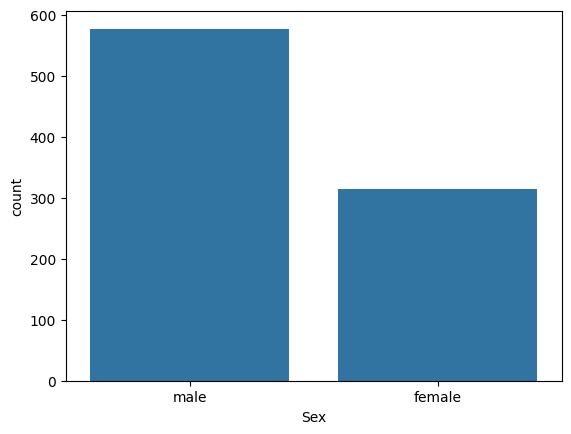

In [19]:
# count of passengers based on gender
sns.countplot(x = 'Sex',data =titanic)
titanic['Sex'].value_counts()

,Sex,Survived
0,female,0.742038
1,male,0.188908


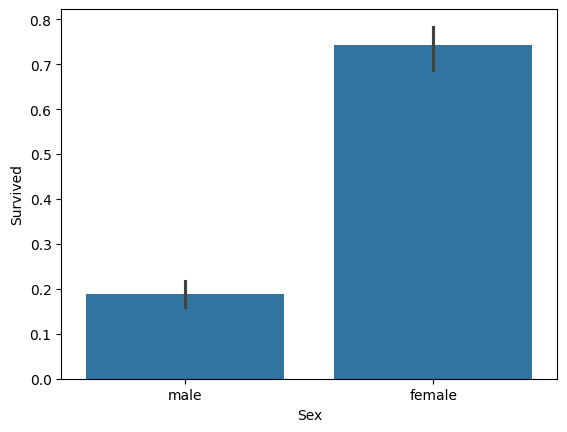

In [20]:
# percentage of passengers survived grouped by gender
sns.barplot(x = "Sex", y = "Survived", data = titanic)
titanic.groupby('Sex', as_index=False).Survived.mean()

<Axes: xlabel='Survived', ylabel='count'>

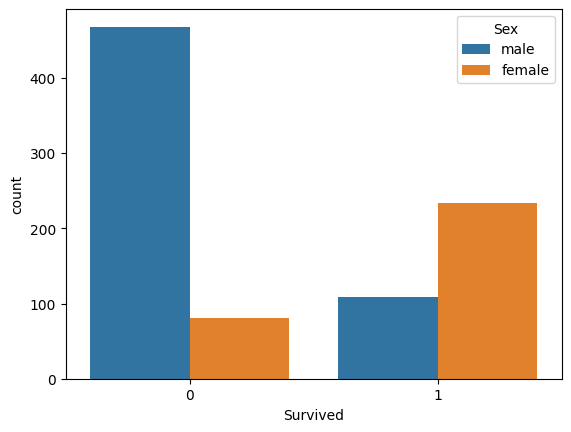

In [21]:
# count of passengers survived based on gender
sns.countplot(x = 'Survived',hue = 'Sex', data = titanic)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

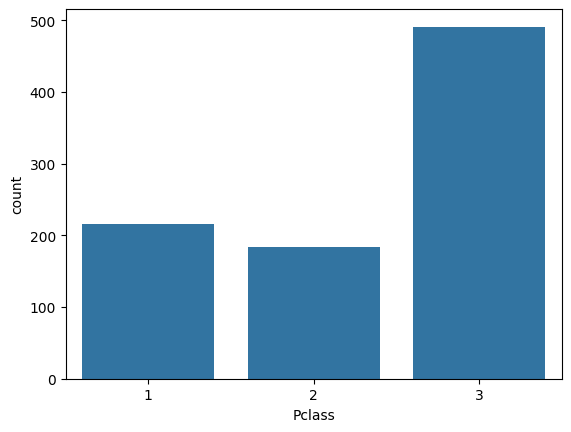

In [24]:
# count of passengers based on Pclass

sns.countplot(x ='Pclass', data = titanic)
titanic['Pclass'].value_counts()



# Number of passengers belonging to 3rd class is 491, number of passengers 
# belonging to 1st class is 216, and number of passengers belonging to second
# 184.  
 

<Axes: xlabel='Sex', ylabel='TravelAlone'>

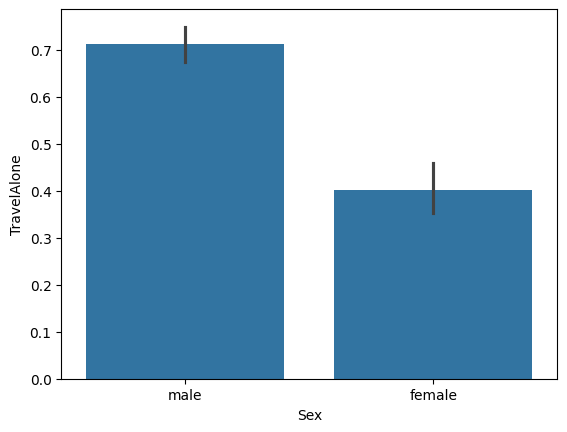

In [26]:
sns.barplot(x = 'Sex', y = 'TravelAlone', data = titanic)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


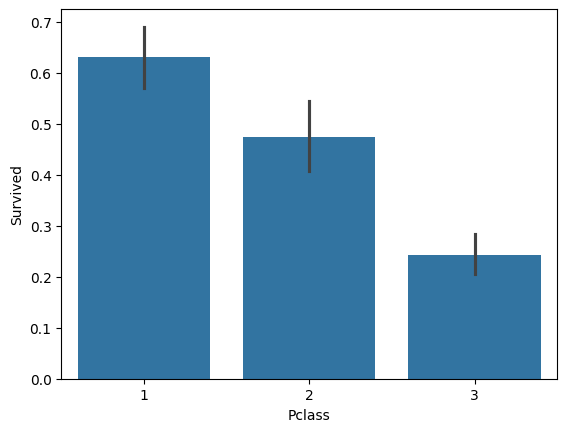

In [27]:
# percentage of passengers survived grouped by Pclass
sns.barplot(x = 'Pclass',y = 'Survived', data = titanic)
titanic.groupby('Pclass', as_index= False).Survived.mean()

<Axes: xlabel='Survived', ylabel='count'>

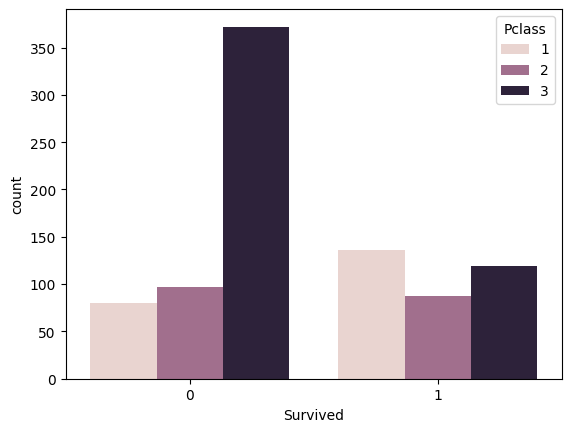

In [28]:
# count of passengers survived based on Pclass
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic)

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

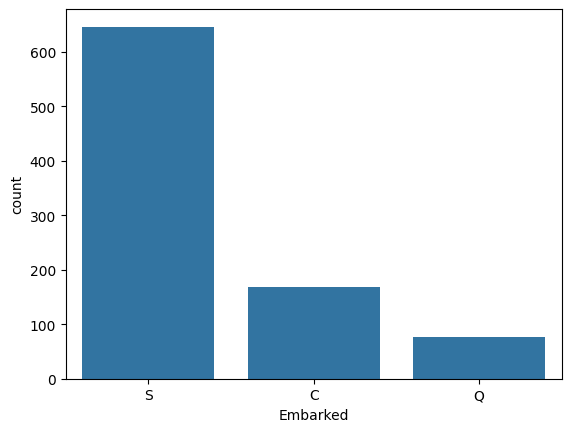

In [30]:
# count of passengers based on Embarked column
sns.countplot(x = 'Embarked', data = titanic)
titanic['Embarked'].value_counts()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


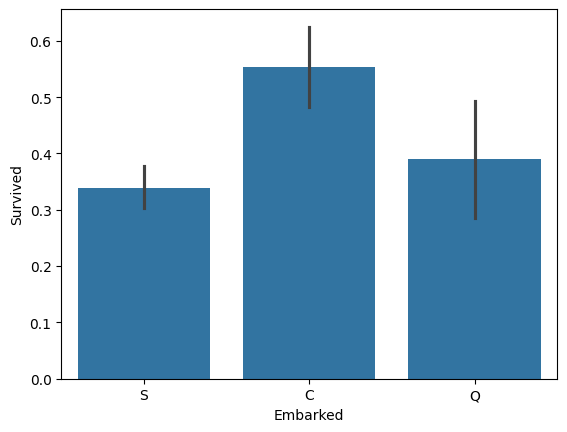

In [31]:
# percentage of survivors grouped by embarked 
sns.barplot(x = 'Embarked', y = 'Survived', data = titanic)
titanic.groupby('Embarked', as_index= False).Survived.mean()

<Axes: xlabel='Survived', ylabel='count'>

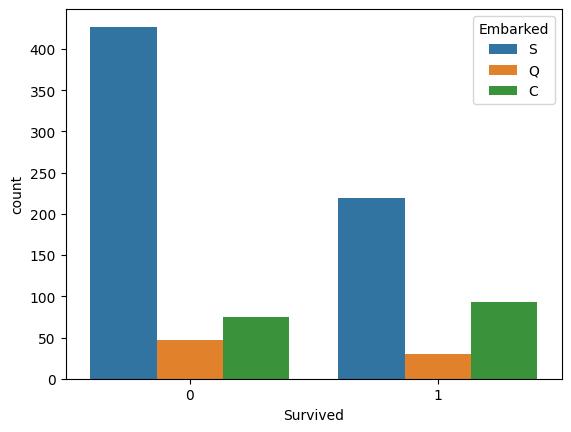

In [32]:
# count of passengers survived based on embark
sns.countplot(x = 'Survived', hue = 'Embarked', data = titanic)

TravelAlone
1    537
0    354
Name: count, dtype: int64

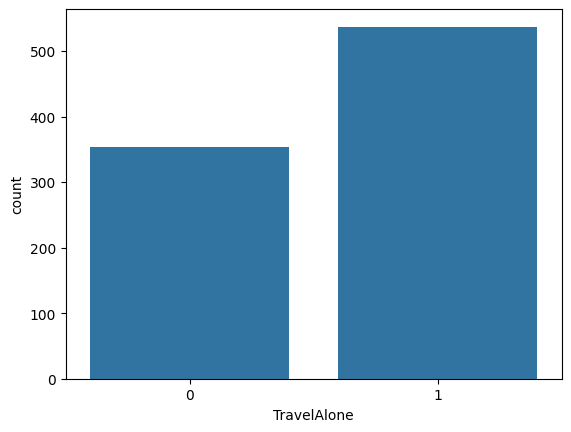

In [34]:
# count of passengers based on if they traveled alone

sns.countplot(x ='TravelAlone', data = titanic)
titanic['TravelAlone'].value_counts()

,TravelAlone,Survived
0,0,0.505650
1,1,0.303538


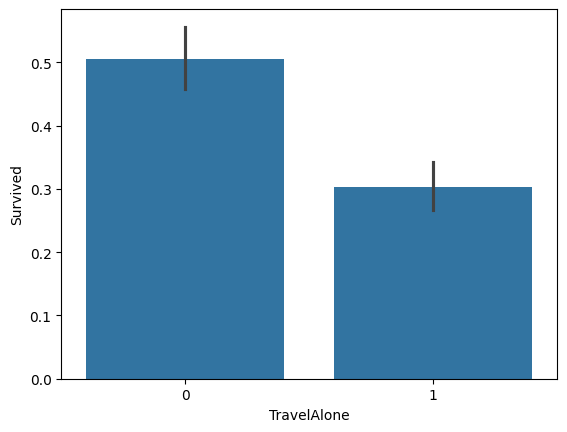

In [35]:
# percentage of passengers grouped by travelling alone
sns.barplot(x = 'TravelAlone', y = 'Survived', data = titanic)
titanic.groupby('TravelAlone', as_index= False).Survived.mean()

The median age of passengers is: 28


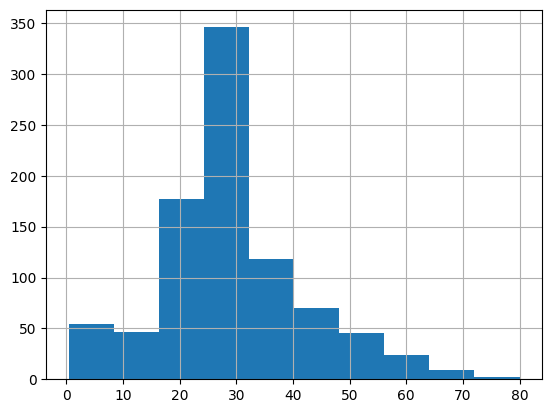

In [37]:
titanic.Age.hist()
print('The median age of passengers is:', 
      int(titanic.Age.median()))

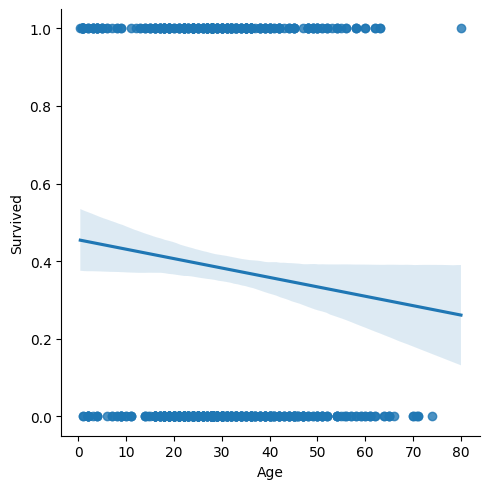

In [40]:
# age group which is more likely to survive
sns.lmplot(x = 'Age', y = 'Survived', data = titanic)

Survived
0    549
1    342
Name: count, dtype: int64

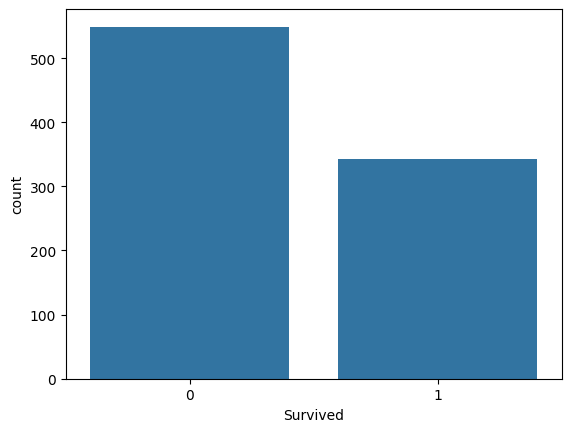

In [42]:
# how many passengers survived 
sns.countplot(x = 'Survived', data =titanic)
titanic['Survived'].value_counts()

In [47]:
# correlation matrix 
#titanic.corr()

#titanic1 = titanic.drop(columns='Sex')
titanic1 = titanic1.drop(columns='Embarked')
titanic1.corr()

,Survived,Pclass,Age,Fare,TravelAlone
Survived,1.000000,-0.338481,-0.064910,0.257307,-0.203367
Pclass,-0.338481,1.000000,-0.339898,-0.549500,0.135207
Age,-0.064910,-0.339898,1.000000,0.096688,0.171647
Fare,0.257307,-0.549500,0.096688,1.000000,-0.271832
TravelAlone,-0.203367,0.135207,0.171647,-0.271832,1.000000


In [50]:
# before building the model, we need to perform label encoding for categorical 
# variables because categorical data needs to be encoded into numbers


# label encoding
# import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()

# Encode lables in column Sex and embarked

# fit_transform ---> used to fit label encoder, returns encoded labels
titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])
titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])

In [51]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,1,22.0,7.2500,2,0
1,1,1,0,38.0,71.2833,0,0
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,0
4,0,3,1,35.0,8.0500,2,1


In [52]:
# setting values for independent and dependent variables
# axis = 0 --> row; axis = 1 ---> column
x = titanic.drop('Survived',axis=1)
y = titanic.Survived

In [53]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 2)

In [56]:
# implementing the logistic regression model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [57]:
# prediction on test set
y_pred = lr_model.predict(x_test)

# predicted values
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [59]:
# actual value and predicted value
a = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})

a.head()

,Actual Value,Predicted Value
707,1,0
37,0,0
615,1,1
169,0,0
68,1,1


## Model Evaluation

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.80      0.66      0.72        79

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



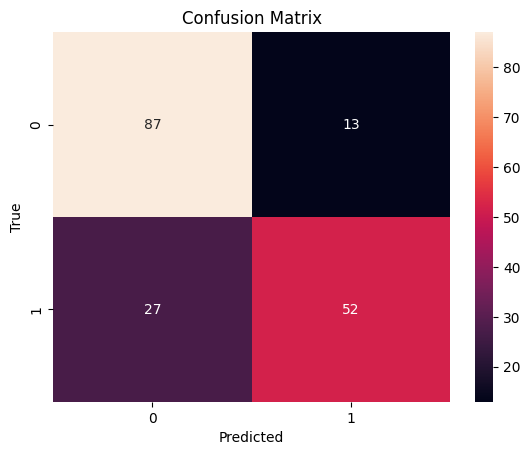

In [64]:
# confusion matrix and classification report

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(matrix, annot = True, fmt= 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report(y_test,y_pred))

# accuracy - 0.78

In [ ]:
# of the 179 instances, 40 were misclassified.